In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from skimage import io, color, filters
from scipy.ndimage import gaussian_filter
from PIL import Image

In [34]:
image = io.imread('rover.jpg')
gray_image = color.rgb2gray(image)

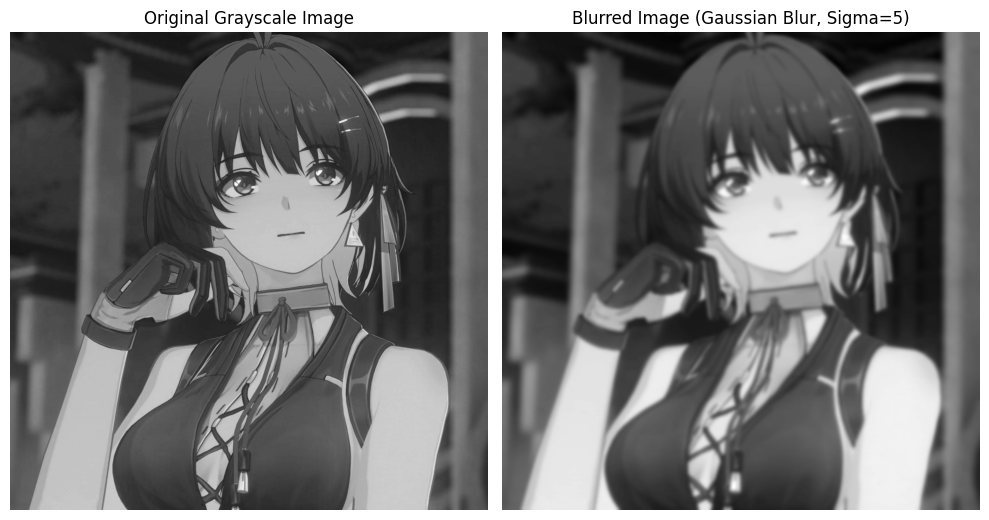

In [68]:
# Apply Gaussian blur using scipy's gaussian_filter
# Sigma determines the amount of blur (higher sigma = more blur)
sigma = 5  # You can experiment with different sigma values
blurred_image = gaussian_filter(gray_image, sigma=sigma)

# Display the original and blurred images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title(f'Blurred Image (Gaussian Blur, Sigma={sigma})')
plt.axis('off')

plt.tight_layout()
plt.show()

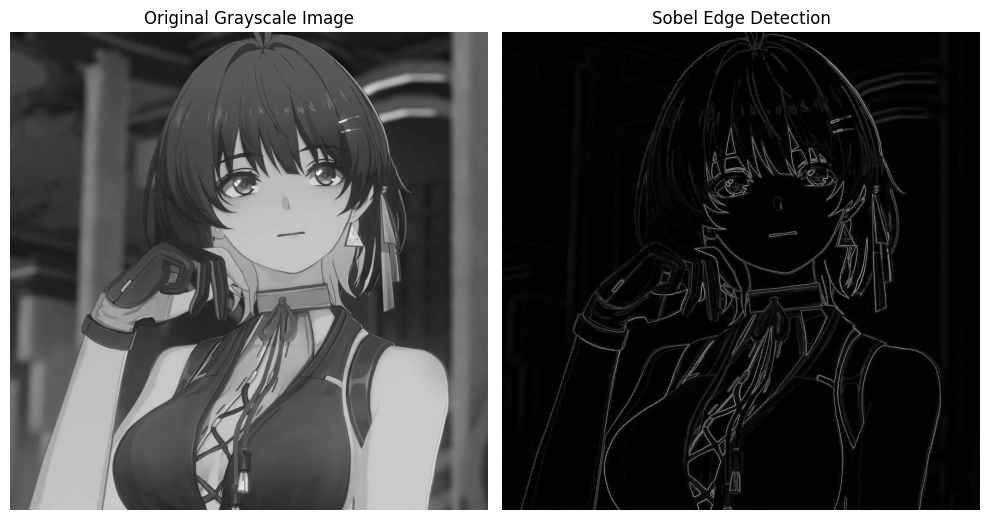

In [69]:
# 4. Perform edge detection using a Sobel filter (2D convolution)
sobel_edges = filters.sobel(gray_image)

# Plot the edge-detected image
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

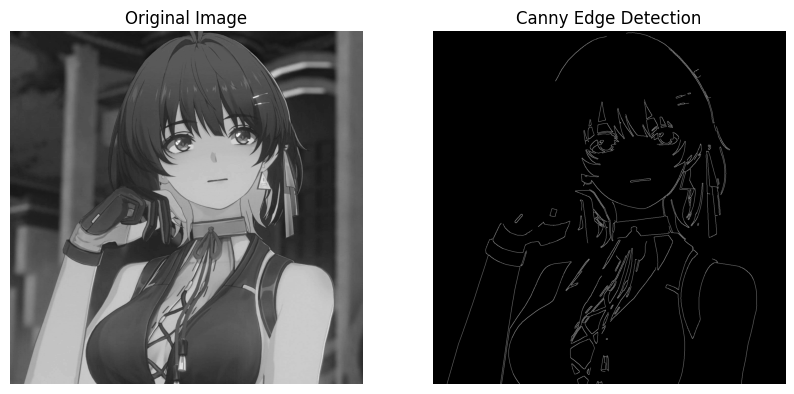

In [61]:
# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

# Apply Canny edge detector
edges = cv2.Canny(blurred_image, 100, 200)

# Display the result
plt.figure(figsize=(10, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

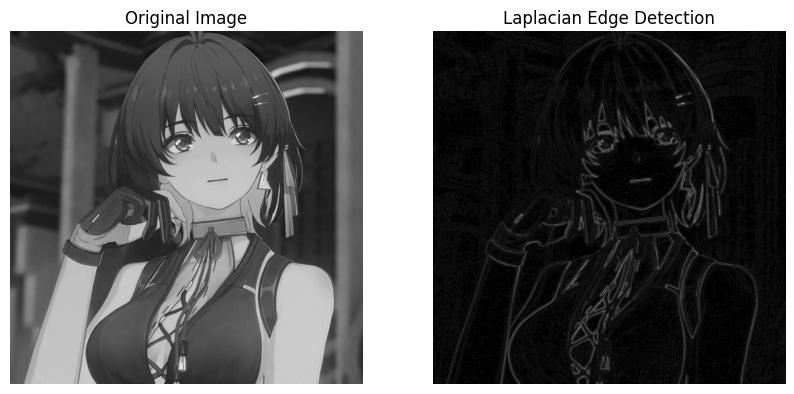

In [60]:
# Apply the Laplacian operator
laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Convert the result to 8-bit (0-255) range
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Display the result
plt.figure(figsize=(10, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.show()


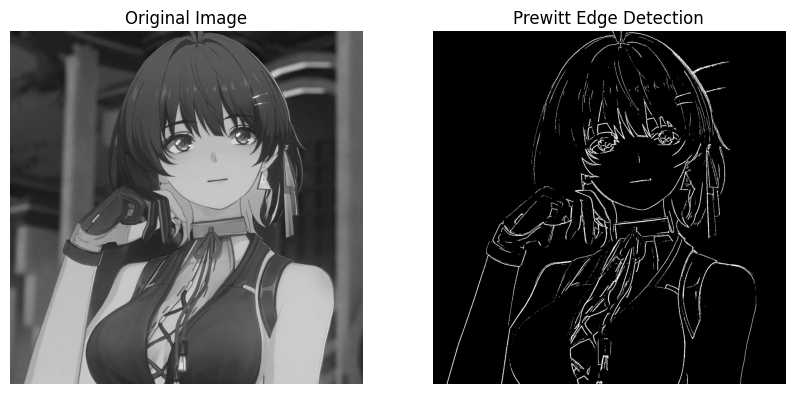

In [59]:
def prewitt_edge_detection(image):
    # Apply horizontal Prewitt kernel
    kernel_x = np.array([[-1, 0, 1],
                         [-1, 0, 1],
                         [-1, 0, 1]])
    horizontal_edges = cv2.filter2D(gray_image, -1, kernel_x)
    
    # Apply vertical Prewitt kernel
    kernel_y = np.array([[-1, -1, -1],
                         [0, 0, 0],
                         [1, 1, 1]])
    vertical_edges = cv2.filter2D(gray_image, -1, kernel_y)    
    # Ensure both arrays have the same data type
    horizontal_edges = np.float32(horizontal_edges)
    vertical_edges = np.float32(vertical_edges)
    
    # Compute gradient magnitude
    gradient_magnitude = cv2.magnitude(horizontal_edges, vertical_edges)
    
    # Optional: Apply thresholding to highlight edges
    threshold = 50
    _, edges = cv2.threshold(gradient_magnitude, threshold, 255, cv2.THRESH_BINARY)
    
    return edges

# Apply Prewitt edge detection
edges = prewitt_edge_detection(image)

# Plotting both images using subplots
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Detected Edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.show()

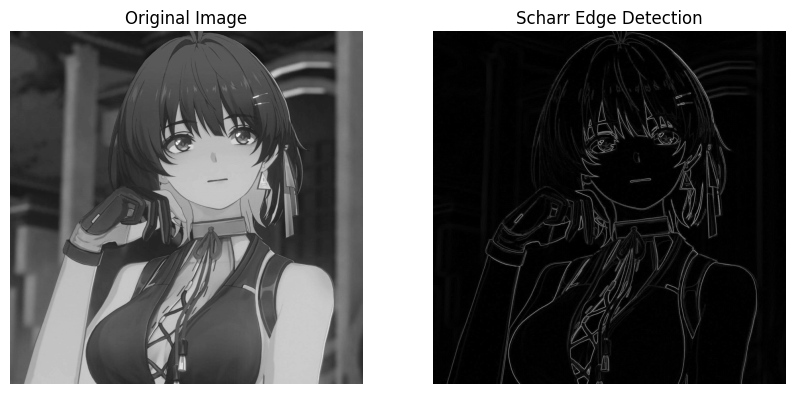

In [58]:
def scharr_edge_detection(image):
    # Apply Scharr operator to find the x and y gradients
    Gx = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
    Gy = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)
    
    # Compute the gradient magnitude
    gradient_magnitude = cv2.magnitude(Gx, Gy)
    
    return gradient_magnitude

def main():
    if image is None:
        print("Error: Image not found.")
        return
    
    # Detect edges using Scharr operator
    edges = scharr_edge_detection(image)
    
    # Plot the results
    plt.figure(figsize=(10, 6))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Scharr Edge Detection
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Scharr Edge Detection')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()
